# Electrodynamics of the Equatorial Ionosphere I
#### By Amadi Brians C.
##### bamadi@brianspace.org

In [18]:
#=========== Import Packages =============
    
import os
import glob
import shutil
import matplotlib
import numpy as np
import pandas as pd
import datetime as dt
from pathlib import Path
import cartopy.crs as ccrs
from netCDF4 import Dataset 
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import cartopy.feature as cfeature
from netCDF4 import date2num, num2date
import matplotlib.gridspec as gridspec
from IPython.display import Video, display, HTML

import sys
import requests
import datetime
from urllib.parse import quote

#This user-defined package contains instruction for downloading
#download some files from zenodo, necessary to make 
#some plots such as magnetic equator, etc.
sys.path.append("..")  # path to your helper script folder
from utils.zenodo_tools import get_from_zenodo
from utils.get_dependencies import ensure_dependencies

import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", message=".*get_cmap function was deprecated.*")

In [11]:
#This code downloads the files and packages
#into a folder named dependencies
ensure_dependencies()

✔ convert_waccmx_datesec.py already exists. Skipping download.
✔ sha.py already exists. Skipping download.
✔ igrf13coeffs.txt already exists. Skipping download.
✔ mag2geo_all.csv already exists. Skipping download.


In [12]:
#Import User-defined packages and files downloaded
sys.path.append("..")  # adjust if needed
from dependencies.convert_waccmx_datesec import *   # or import specific functions
import dependencies.sha as sha

In [13]:
#Read the magnetic equator file
BASE_DIR = os.getcwd()  # current working directory
mag2geo = os.path.join(BASE_DIR, "dependencies", "mag2geo_all.csv")
df2 = pd.read_csv(mag2geo, delim_whitespace = False, header = 0)

In [14]:
# ===== File with WACCM-X EDens =====
wacx = Dataset('../data/WACCMX_subset.nc')

In [15]:
from field_lines import plot_field_lines
from field_lines import var_orth_to_magfldline

### Theory of the Equatorial Ionosphere

- As you may know, the atmosphere gets thinner with height. This implies that the ionosphere with three layers (lower - D, middle - E and upper -F) or regions, interacts with different density of atmospheric gases.

- At low altitude, the collisions between plasma constituents and neutral gases are much higher. I guess you know why? More interactions of course.

- At higher altitudes, the collisions are much smaller and hence, the mobility of ions $\kappa_{i}$ and electrons $\kappa_e$ will be large. Ion motion is represented by the equation:

\begin{equation}
(\textbf{V}_{i})_{\perp} = [\textbf{E} - (\frac{k_BT_i}{q_i})\frac{\nabla{n}}{n} + (\frac{M_i}{q_i})\textbf{g}] \times \frac{\textbf{B}}{B^2}
\end{equation}

- The constituent of this equation will be discussed subsequently.

##### 1. Pressure gradient: 
The term shaded with a yellow background in the equation is the **pressure gradient** term.
$$
(\mathbf{V}_{i})_{\perp} =
\left[
\mathbf{E}
- \bbox[yellow,5px,border:1px solid black]{
\left(\frac{k_B T_i}{q_i}\right)\frac{\nabla n}{n}}
+ \left(\frac{M_i}{q_i}\right)\mathbf{g}
\right] \times \frac{\mathbf{B}}{B^2}
$$


where,

- $\frac{k_BT_i}{q_i}$: ion thermal energy (Boltzmann constant × ion temperature).

- $\frac{\nabla{n}}{n}$: relative density gradient of the plasma.

- Together, this represents how ions drift due to pressure gradients in the plasma (diamagnetic drift).

- Gradient means variation, degree of change or difference in a measurable physical quantity

- Therefore, Pressure Gradient is the difference in pressure between any two or more points, say, points A and B.

- But, what is pressure? In terms of ions, we can define pressure in simple terms as:

\begin{equation}
P_i = nk_BT_i
\end{equation}

- In the height range of the ionosphere under study, the temperature is assumed constant for a single gas. Hence, the primary driver of pressure gradient will be the change in density.

- Ok, lets take a look at density.

- Consider the subplots in Figure 3.1. It shows plasma density in Enugu, Nigeria (African sector); Cat Hill, Ascension Island (Atlantic sector); and Sao Jose dos Campos, Brazil (American sector).

- Using the colorbar, it is easy to observe that the ion (plasma) density increases with height until about 350, 320 and 300 km in the African, Atlantic and American sectors respectively. This **height with peak ion density** is known as F2 peak layer **(hmF2)**. 

- Beyond **hmF2**, ion density starts decreasing. Hence, the plasma density at F layer is much higher than the layers above. That means, the plasma density at point A above the F layer is negative or less than zero. Mathematically, this can be written as:

\begin{equation}
\frac{dP}{dz} < 0 
\qquad \text{and} \qquad 
\frac{\nabla n}{n} \propto \frac{dP}{dz}
\end{equation}

In vector (gradient vector) analysis, we know that up is positive and down is negative.

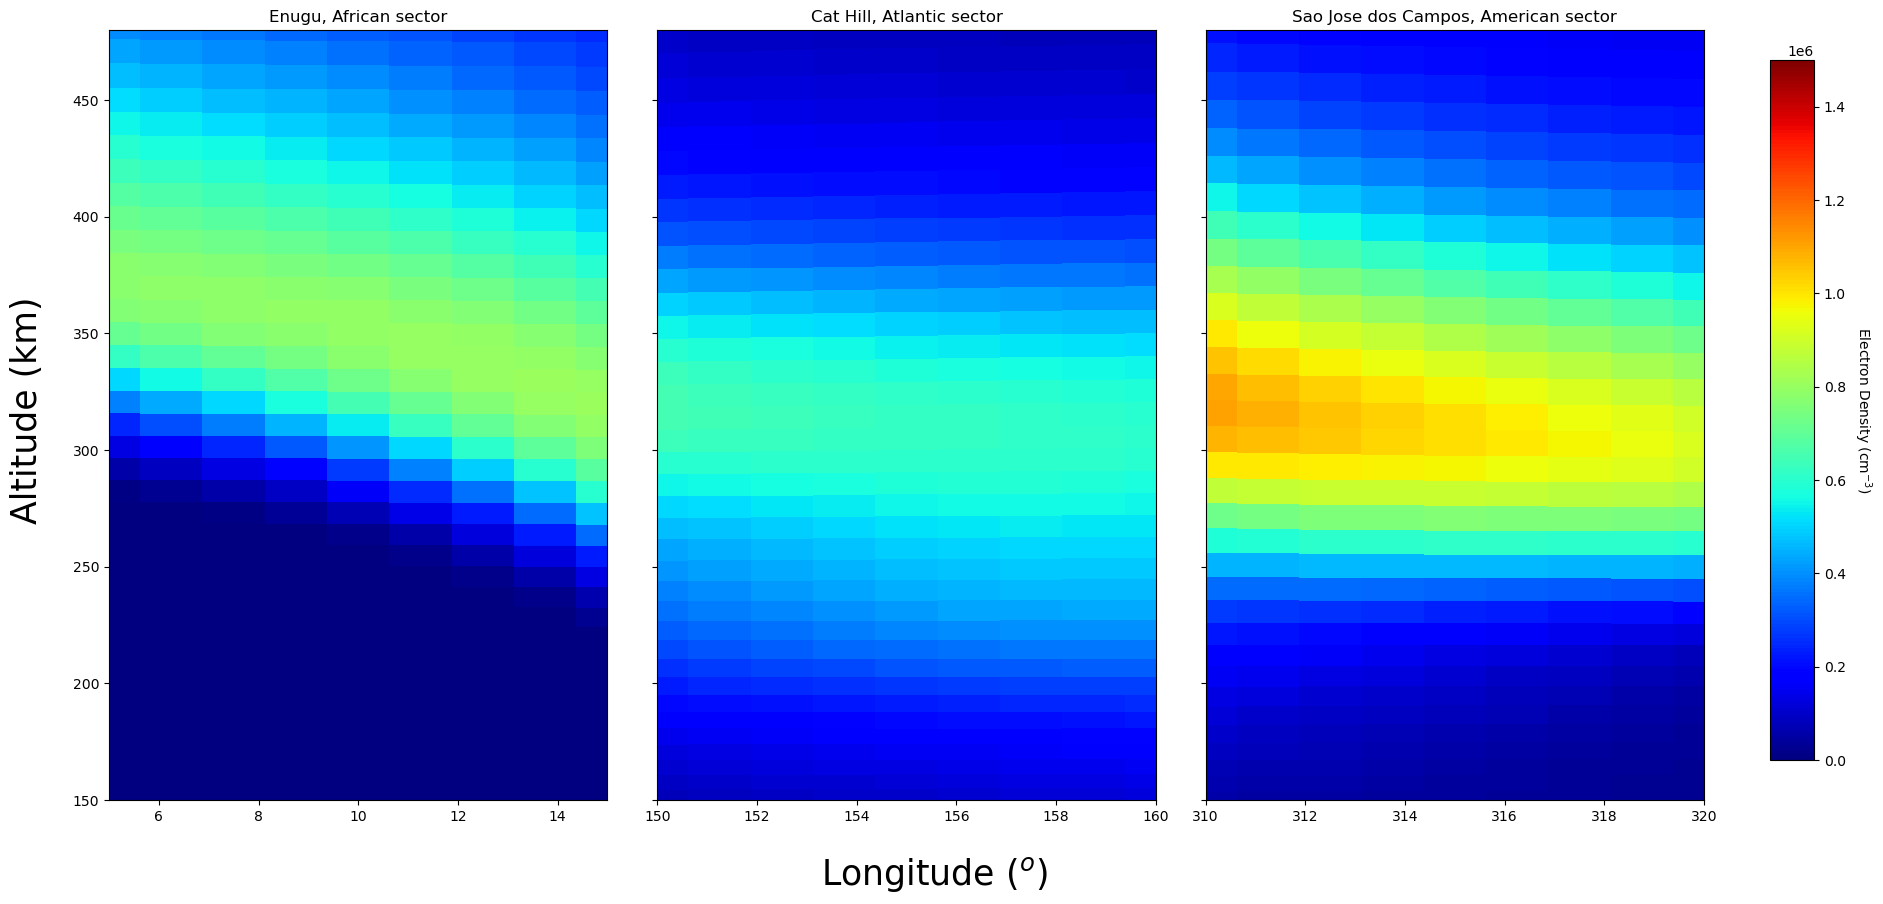

In [16]:

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(22, 10), sharey=True)

for i, ax in enumerate(axes.flat):
    if i == 0:
        l1, l2, la = 0, 13, 102
    if i == 1:
        l1, l2, la = 118, 130, 87
    if i == 2:
        l1, l2, la = 248, 260, 71    

    im = ax.pcolormesh(
        wacx['lon'][:][l1:l2],
        wacx['Z3'][6, :, la, l1:l2] / 1000,
        wacx['EDens'][12, :, la, l1:l2],
        cmap=plt.cm.get_cmap('jet', 200),
        vmin=0, vmax=1.5E6, shading="auto"
    )

    if i == 0:
        ax.set_xlim([5, 15]) 
        ax.set_title('Enugu, African sector')
    if i == 1:
        ax.set_xlim([150, 160])
        ax.set_title('Cat Hill, Atlantic sector')
    if i == 2:
        ax.set_xlim([310, 320]) 
        ax.set_title('Sao Jose dos Campos, American sector')
        
    ax.set_ylim([150, 480])

# Add more space between subplots
fig.subplots_adjust(wspace=0.1, right=0.85)

# Add a common colorbar
cbar_ax = fig.add_axes([0.88, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
cb = fig.colorbar(im, cax=cbar_ax)
cb.ax.set_ylabel('Electron Density (cm$^{-3}$)', rotation=270, labelpad=20)

# Global labels
fig.text(0.5, 0.025, 'Longitude ($^o$)', ha='center', fontsize=25)
fig.text(0.08, 0.5, 'Altitude (km)', va='center', rotation='vertical', fontsize=25)

plt.show()

##### Gravity term
- The term shaded with an orange-colored background in the equation is the **pressure gradient** term.
$$
(\mathbf{V}_{i})_{\perp} =
\left[
\mathbf{E}
- \left(\frac{k_B T_i}{q_i}\right)\frac{\nabla n}{n}
+ \bbox[orange,5px,border:1px solid black]{\left(\frac{M_i}{q_i}\right)\mathbf{g}}
\right] \times \frac{\mathbf{B}}{B^2}
$$

where,

- $M_i$: ion mass,

- $q_i$: ion charge

- $\textbf{g}$: gravitational acceleration.

- In the ionosphere, this is important for heavier ions, though often small compared to other forces.

- Although, gravity is downward, it is positive in the equation because $\textbf{g} = -g\hat{z}$, where g is the magntiude of the acceleration due to gravity. So, introducing the negative sign when pointing downwards make the gravity term in the equation positive.

##### Magnetic field term
- The term shaded with a yellow background in the equation is the **magnetic field** term.

$$
(\mathbf{V}_{i})_{\perp} =
\left[
\mathbf{E}
- \left(\frac{k_B T_i}{q_i}\right)\frac{\nabla n}{n}
+ \left(\frac{M_i}{q_i}\right)\mathbf{g}
\right] \times \bbox[yellow,5px,border:1px solid black]{\frac{\mathbf{B}}{B^2}}
$$

- The factor ensures the motion is orthogonal to $\textbf{B}$ and scales with the magnetic field strength.

#### Why the cross product ($\times$)?

- The cross product ($\times$) between the terms in the square bracket and the **magnetic field term** implies that all the terms in the square bracket acts in a direction perpendicular (orthogonal) to the magnetic field. See Figure 3.2.

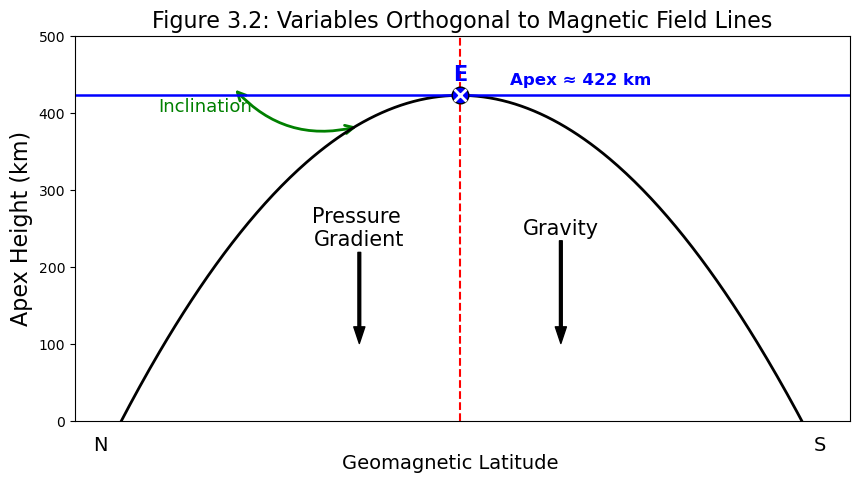

In [17]:
# You can also manually select which line to plot:
var_orth_to_magfldline(num_lines=10, plot_index=4)


- So, the primary drivers of the **electrodynamics** of the **equatorial ionosphere** are **Neutral winds**, **magnetic field** and **electric field**. Pressure gradient (density gradient) and gravity also play a small but significant role.

##### References:

Kelley, M. C. (2009). The Earth’s ionosphere: Plasma physics and electrodynamics (2nd ed.). Academic Press.